# Code for Studying Happiness in the World 

## Importing Packages and Defining the Necessary Functions

In [1]:
# The following packages are used in our analysis below.

import numpy as np
import pandas as pd
import chardet
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# The 'Outlier_Elimination' function replaces the outliers of the list x by the bound. UpLow indicates whether 
# the given bound is an upper or a lower bound.

def Outlier_Elimination(x,bound,UpLow):
    if UpLow=='U':
        if x>bound:
            return bound
        else:
            return x
    elif UpLow=='L':
        if x<bound:
            return bound
        else:
            return x
    else: 
        print('It has not been specified properly whether the bound is a lower bound or an upper bound!')

In [3]:
# The 'Lin_Reg' function finds the least square regression line for the two lists 'Lone' and 'Ltwo'. Parameter 'c'
# specifies the color of the regression line.

def Lin_Reg(Lone,Ltwo,c):
    a=np.polyfit(Lone,Ltwo,1)
    y=lambda x: a[0]*x+a[1]
    b=np.linspace(min(Lone),max(Lone),200)
    return plt.plot(b,y(b),color=c)

## Reading the csv Source Files and Cleaning the Data (The reader may skip this section!)

### Reading of the Source Files

In [4]:
# The csv source files are are provided by kaggle for 5 consecutive years: 2015, 2016, 2017, 2018, 2019

path=['','','','',''];
path[0]="/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/GDP/Hap_2015.csv"
path[1]="/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/GDP/Hap_2016.csv"
path[2]="/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/GDP/Hap_2017.csv"
path[3]="/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/GDP/Hap_2018.csv"
path[4]="/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/GDP/Hap_2019.csv"

In [5]:
# Identifying the correct encoding for the csv files.

for k in range(len(path)):
    with open(path[k], "rb") as fraw:
        file_content = fraw.read(1000)
    
    print(chardet.detect(file_content))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [6]:
# Reading the csv files and storing them in a list. In this case, the csv files can be read even without 
# identifying the encoding. 

Hap=[];
for k in range(len(path)):
    Hap.append(pd.read_csv(path[k]))

### Cleaning the Data

In [7]:
# We first compare the titles of the columns of all 5 files. It is realized that although some columns represent 
# the same content (e.g. 'Economy (GDP per Capita)', 'GDP per capita', and 'Economy..GDP.per.Capita.'), the titles
# are different! 

for k in range(len(Hap)):
    print(Hap[k].columns.tolist(), end =" \n")

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] 
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expec

In [8]:
# We first get rid of all the blank spaces and dots (i.e. ' ' and '.') in the titles of columns at once.

for k in range(len(path)):
    Hap[k].columns=Hap[k].rename(columns= lambda x: x.replace(" ", "_")).columns.tolist()
    Hap[k].columns=Hap[k].rename(columns= lambda x: x.replace(".", "_")).columns.tolist()

In [9]:
# We choose uniform titles for all equivalent columns of the 5 files.

for k in range(3):
    Hap[k]=Hap[k].rename(columns={'Economy_(GDP_per_Capita)':'GDP_per_capita',
                                  'Trust_(Government_Corruption)':'Corruption',
                                  'Health_(Life_Expectancy)':'Health','Economy__GDP_per_Capita_':'GDP_per_capita',
                                 'Trust__Government_Corruption_':'Corruption','Health__Life_Expectancy_':'Health'})
    
for k in range(3,5):
    Hap[k]=Hap[k].rename(columns={'Score':'Happiness_Score','Overall_rank':'Happiness_Rank',
                                  'Country_or_region':'Country','Freedom_to_make_life_choices':'Freedom',
                                  'Perceptions_of_corruption':'Corruption','Healthy_life_expectancy':'Health'})

In [10]:
# We now find the columns with common titles in all 5 files.

Common_titles=set(Hap[0].columns.tolist())
for k in range(len(Hap)):
    Common_titles=Common_titles & set(Hap[k].columns.tolist())

Common_titles

{'Corruption',
 'Country',
 'Freedom',
 'GDP_per_capita',
 'Generosity',
 'Happiness_Rank',
 'Happiness_Score',
 'Health'}

In [11]:
# We check if there is any missing entry in the common columns of the 5 files.

for k in range(len(Hap)):
    Hap[k][Hap[k]['Country'].isna()]
    Hap[k][Hap[k]['Happiness_Rank'].isna()]
    Hap[k][Hap[k]['Happiness_Score'].isna()]
    Hap[k][Hap[k]['GDP_per_capita'].isna()]
    Hap[k][Hap[k]['Generosity'].isna()]
    Hap[k][Hap[k]['Freedom'].isna()]
    Hap[k][Hap[k]['Corruption'].isna()]
    Hap[k][Hap[k]['Health'].isna()]

### Checking and Replacing Outliers

#### Outliers of the Happiness_Score 

Text(0.5, 1.0, 'Happiness Score (2015-2019)')

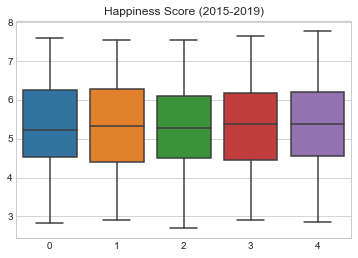

In [12]:
# The boxplots of the Happiness_Score Columns are plotted below. The boxplots correspond to years 2015-2019 from
# left to right. For this parameter, not outliers are observed in any of the years. 
# Note: I did not know how combine all the boxplots in one frame. I searched Google, and found a way to do it.

BoxPlot_Happiness = sns.boxplot(data=[Hap[0].Happiness_Score,Hap[1].Happiness_Score,Hap[2].Happiness_Score,
                       Hap[3].Happiness_Score,Hap[4].Happiness_Score])
plt.title('Happiness Score (2015-2019)')

#### Outliers of the GDP_per_capita 

Text(0.5, 1.0, 'GDP per Capita (2015-2019)')

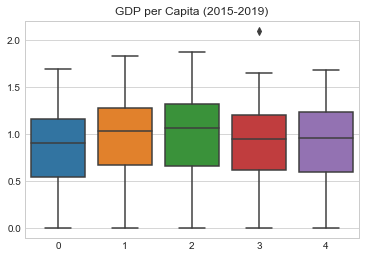

In [13]:
# The following are the boxplots of the GDP_per_capita columns. As is observed, there are some outliers for the
# year 2018.

BoxPlot_GDP = sns.boxplot(data=[Hap[0].GDP_per_capita,Hap[1].GDP_per_capita,Hap[2].GDP_per_capita,
                       Hap[3].GDP_per_capita,Hap[4].GDP_per_capita])
plt.title('GDP per Capita (2015-2019)')

In [14]:
# Using the Outlier_Elimination function defined earlier, we replace the outliers by the upper bounds (Note that in
# this case, the Outlier_Elimination does not do anything on the other years than 2018. This format is used to 
# perform the operation in a uniform manner.)

UpperBounds=[2.0,2.0,2.0,2.0,2.0]
for k in range(len(Hap)):
    Hap[k].GDP_per_capita = Hap[k].GDP_per_capita.apply(Outlier_Elimination,args=(UpperBounds[k],'U',))

Text(0.5, 1.0, 'GDP per Caipta (2015-2019)')

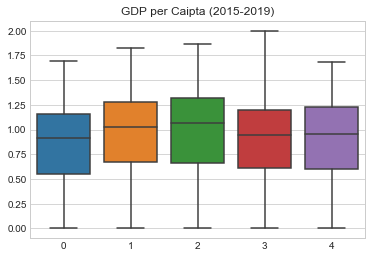

In [15]:
# Checking that all outliers have been taken care of.

BoxPlot_GDP = sns.boxplot(data=[Hap[0].GDP_per_capita,Hap[1].GDP_per_capita,Hap[2].GDP_per_capita,
                       Hap[3].GDP_per_capita,Hap[4].GDP_per_capita])
plt.title('GDP per Caipta (2015-2019)')

#### Outliers of the Generosity 

Text(0.5, 1.0, 'Generosity (2015-2019)')

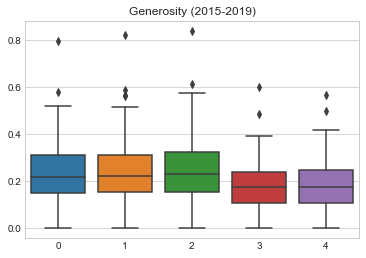

In [16]:
# The boxplots of Generosity columns show that there are outliers for all years.

BoxPlot_Generosity = sns.boxplot(data=[Hap[0].Generosity,Hap[1].Generosity,Hap[2].Generosity,
                       Hap[3].Generosity,Hap[4].Generosity])
plt.title('Generosity (2015-2019)')

In [17]:
# Using the Outlier_Elimination function, we replace all outliers with the upper bounds.

UpperBounds=[0.5,0.5,0.55,0.43,0.44]
for k in range(len(Hap)):
    Hap[k].Generosity = Hap[k].Generosity.apply(Outlier_Elimination,args=(UpperBounds[k],'U',))

Text(0.5, 1.0, 'Generosity (2015-2019)')

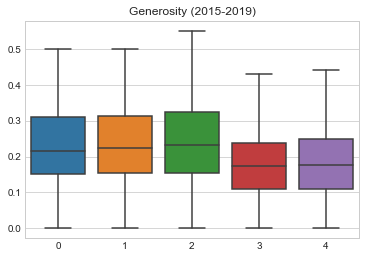

In [18]:
# Checking that all outliers have been taken care of.

BoxPlot_Generosity = sns.boxplot(data=[Hap[0].Generosity,Hap[1].Generosity,Hap[2].Generosity,
                       Hap[3].Generosity,Hap[4].Generosity])
plt.title('Generosity (2015-2019)')

#### Outliers of the Freedom 

Text(0.5, 1.0, 'Freedom (2015-2019)')

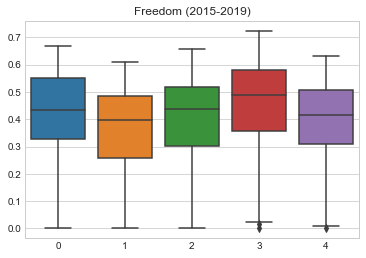

In [19]:
# The boxplots of the Freedom columns show that there are some outliers for years 2018 and 2019.

BoxPlot_Freedom = sns.boxplot(data=[Hap[0].Freedom,Hap[1].Freedom,Hap[2].Freedom,
                       Hap[3].Freedom,Hap[4].Freedom])
plt.title('Freedom (2015-2019)')

In [20]:
# Using the Outlier_Elimination function, we replace all outliers with the lower bounds.

LowerBounds=[0,0,0,0.03,0.02]
for k in range(len(Hap)):
    Hap[k].Freedom = Hap[k].Freedom.apply(Outlier_Elimination,args=(LowerBounds[k],'L',))

Text(0.5, 1.0, 'Freedom (2015-2019)')

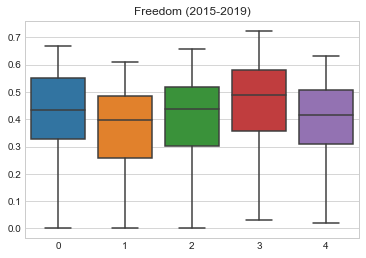

In [21]:
# Checking that all outliers have been taken care of.

BoxPlot_Freedom = sns.boxplot(data=[Hap[0].Freedom,Hap[1].Freedom,Hap[2].Freedom,
                       Hap[3].Freedom,Hap[4].Freedom])
plt.title('Freedom (2015-2019)')

#### Outliers of the Corruption 

Text(0.5, 1.0, 'Corruption (2015-2019)')

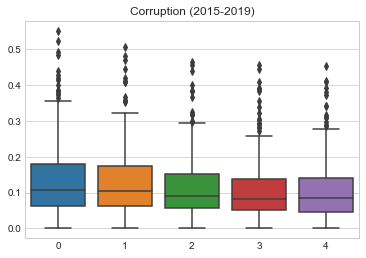

In [22]:
# The boxplots of the Corruption columns show that there many outliers for all years 2015-2019.

BoxPlot_Corruption = sns.boxplot(data=[Hap[0].Corruption,Hap[1].Corruption,Hap[2].Corruption,
                       Hap[3].Corruption,Hap[4].Corruption])
plt.title('Corruption (2015-2019)')

In [23]:
# Using the Outlier_Elimination function, we replace all outliers with the upper bounds.

UpperBounds=[0.35,0.33,0.29,0.26,0.28]
for k in range(len(Hap)):
    Hap[k].Corruption = Hap[k].Corruption.apply(Outlier_Elimination,args=(UpperBounds[k],'U',))

Text(0.5, 1.0, 'Corruption (2015-2019)')

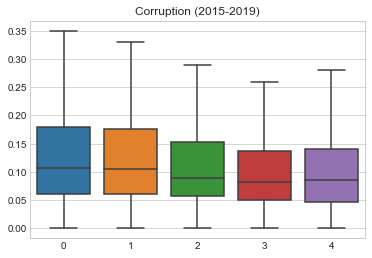

In [24]:
# Checking that all outliers have been taken care of.

BoxPlot_Corruption = sns.boxplot(data=[Hap[0].Corruption,Hap[1].Corruption,Hap[2].Corruption,
                       Hap[3].Corruption,Hap[4].Corruption])
plt.title('Corruption (2015-2019)')

#### Outliers of Health

Text(0.5, 1.0, 'Health (2015-2019)')

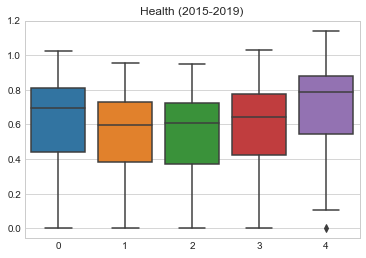

In [25]:
# The boxplots of the Health columns show that there are few outliers only for the year 2019.

BoxPlot_Health = sns.boxplot(data=[Hap[0].Health,Hap[1].Health,Hap[2].Health,
                       Hap[3].Health,Hap[4].Health])
plt.title('Health (2015-2019)')

In [26]:
# Using the Outlier_Elimination function, we replace all outliers with the lower bounds.

LowerBounds=[0,0,0,0,0.05]
for k in range(len(Hap)):
    Hap[k].Health = Hap[k].Health.apply(Outlier_Elimination,args=(LowerBounds[k],'L',))

Text(0.5, 1.0, 'Health (2015-2019)')

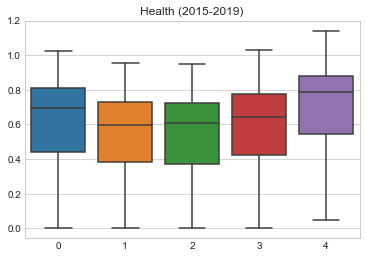

In [27]:
# Checking that all outliers have been taken care of.

BoxPlot_Health = sns.boxplot(data=[Hap[0].Health,Hap[1].Health,Hap[2].Health,
                       Hap[3].Health,Hap[4].Health])
plt.title('Health (2015-2019)')

## Analyzing the Data (Main Section)

### Exploring the Correlation between Happiness_Rank/Happiness_Score and other Considered Parameters 

#### Correlation between Happiness_Rank and GDP_per_capita

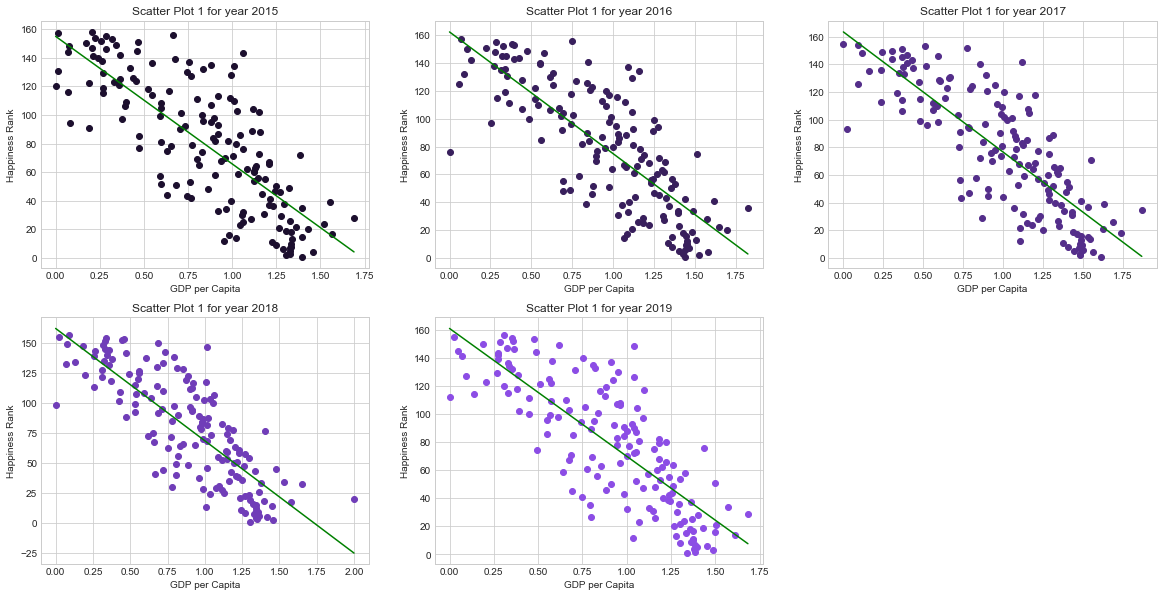

In [28]:
# The following scatter plots show a strong negative correlation between the Happiness_Rank and the GDP_per-Capita.
# That is, the higher GDP_per_capita is the lower the Happiness_Rank will be (note that a lower numeric rank means
# a happier countery). The solid line indicates the least square regression line.

# Note: I did not know how to represent many plots together. Searching Google, I found a solution through the 
# 'subplot' command.  

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].GDP_per_capita,Hap[k].Happiness_Rank,'o',color=((k+1)*0.11,(k+1)*0.06,(k+1)*0.18))
    Lin_Reg(Hap[k].GDP_per_capita,Hap[k].Happiness_Rank,'g')
    plt.title('Scatter Plot 1 for year 201{}'.format(k+5))
    plt.xlabel('GDP per Capita')
    plt.ylabel('Happiness Rank')

#### Correlation between Happiness_Score and GDP_per_capita

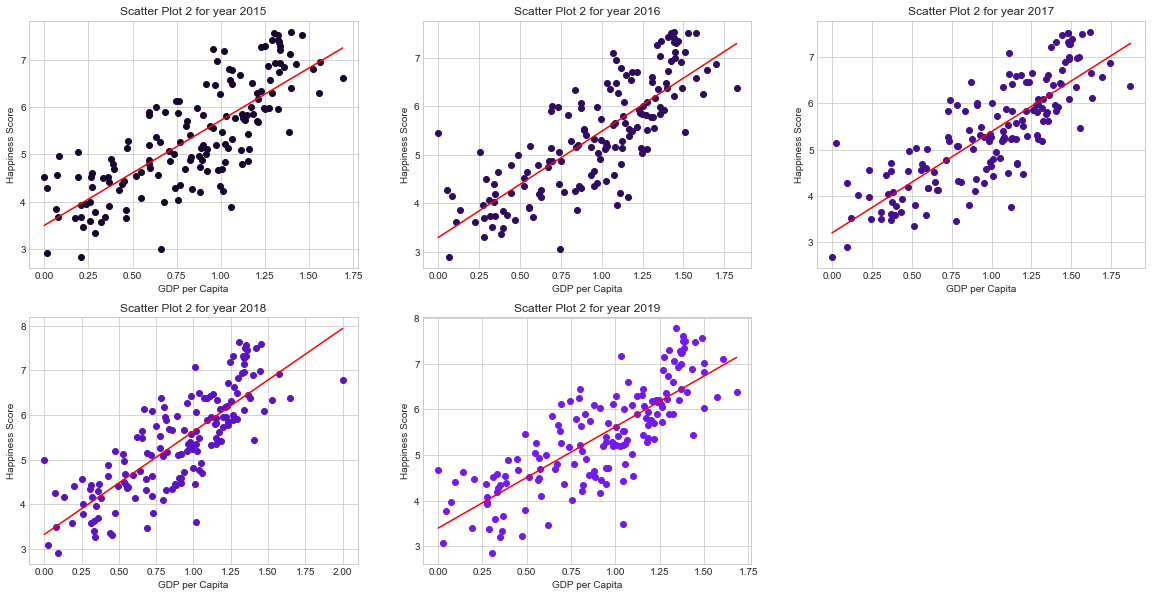

In [29]:
# The following scatter plots show a strong positive correlation between the Happiness_Score and the 
# GDP_per-Capita.

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].GDP_per_capita,Hap[k].Happiness_Score,'o',color=((k+1)*0.09,(k+1)*0.02,(k+1)*0.19))
    Lin_Reg(Hap[k].GDP_per_capita,Hap[k].Happiness_Score,'r')
    plt.title('Scatter Plot 2 for year 201{}'.format(k+5))
    plt.xlabel('GDP per Capita')
    plt.ylabel('Happiness Score')

#### Correlation between Happiness_Score and Health

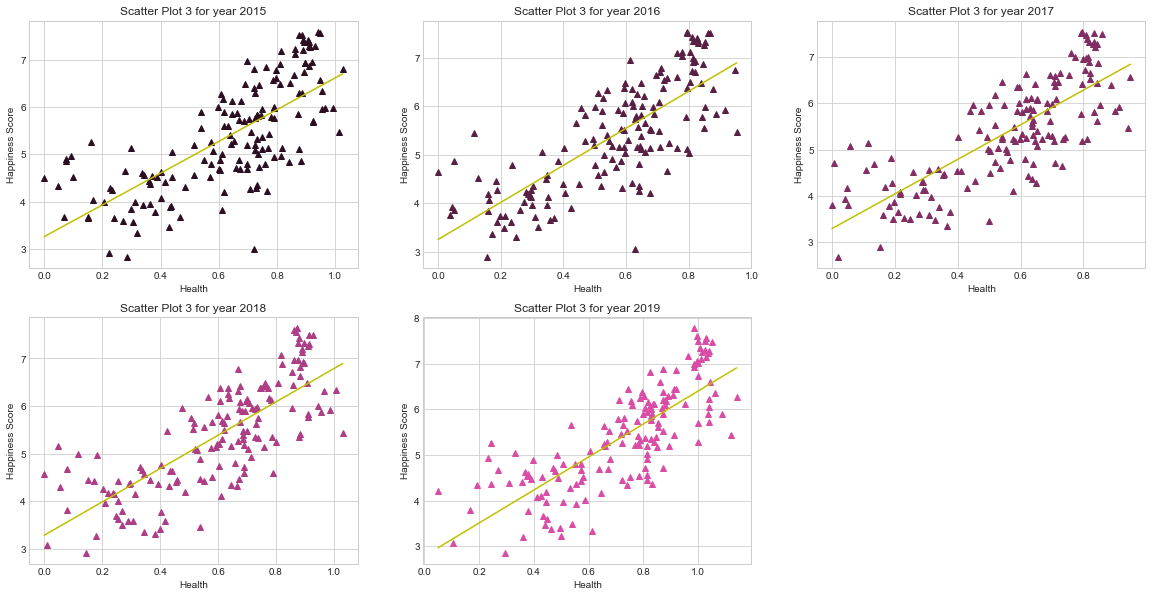

In [30]:
# The following scatter plots show a fairly strong positive correlation between the Happiness_Score and the Health.

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].Health,Hap[k].Happiness_Score,'^',color=((k+1)*0.17,(k+1)*0.06,(k+1)*0.13))
    Lin_Reg(Hap[k].Health,Hap[k].Happiness_Score,'y')
    plt.title('Scatter Plot 3 for year 201{}'.format(k+5))
    plt.xlabel('Health')
    plt.ylabel('Happiness Score')

#### Correlation between Happiness_Score and Freedom

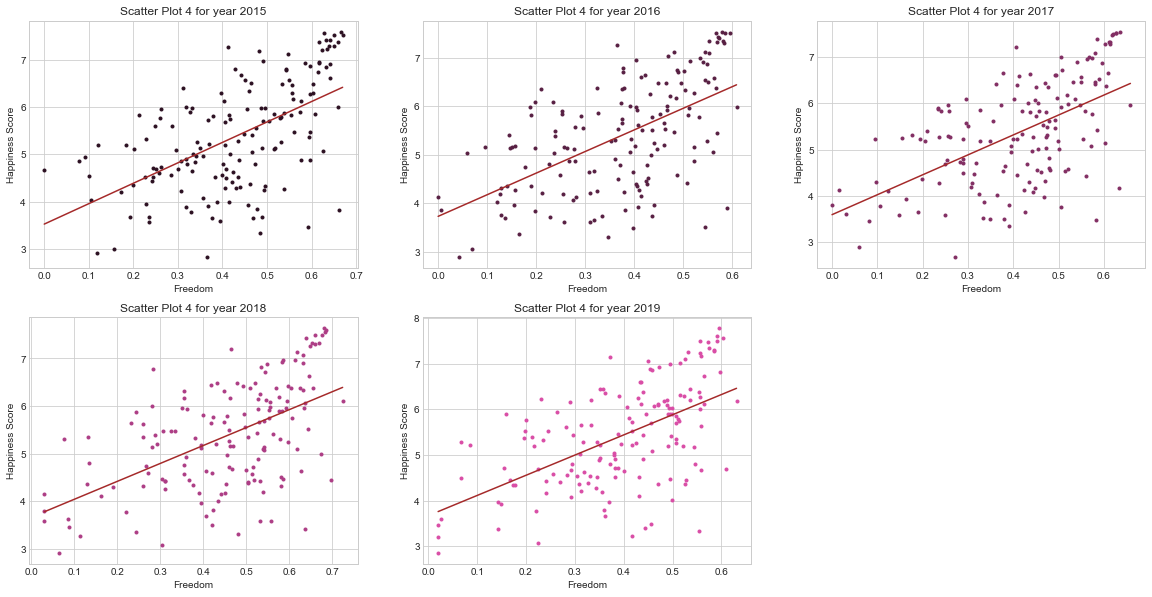

In [31]:
# The following scatter plots show a relatively weak positive correlation between the Happiness_Score and 
# the Health.

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].Freedom,Hap[k].Happiness_Score,'.',color=((k+1)*0.17,(k+1)*0.06,(k+1)*0.13))
    Lin_Reg(Hap[k].Freedom,Hap[k].Happiness_Score,'brown')
    plt.title('Scatter Plot 4 for year 201{}'.format(k+5))
    plt.xlabel('Freedom')
    plt.ylabel('Happiness Score')

#### Correlation between Happiness_Score and Generosity

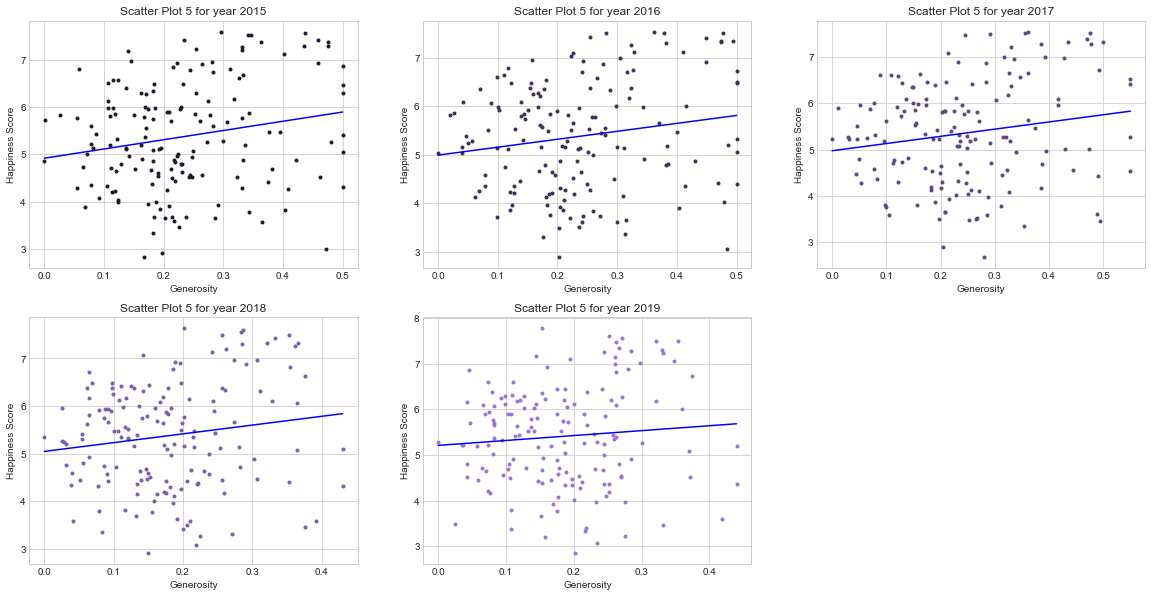

In [32]:
# The following scatter plots indicate a very weak positive correlation between the Happiness_Score and the 
# Generosity!

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].Generosity,Hap[k].Happiness_Score,'.',color=((k+1)*0.12,(k+1)*0.09,(k+1)*0.17))
    Lin_Reg(Hap[k].Generosity,Hap[k].Happiness_Score,'b')
    plt.title('Scatter Plot 5 for year 201{}'.format(k+5))
    plt.xlabel('Generosity')
    plt.ylabel('Happiness Score')

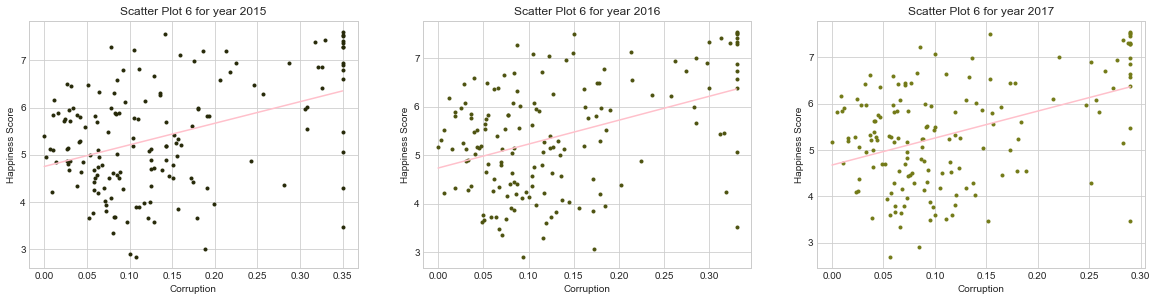

In [33]:
# The following scatter plots indicate a weak positive correlation between the Happiness_Score and the Corruption!

for k in range(len(Hap)-2):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].Corruption,Hap[k].Happiness_Score,'.',color=((k+1)*0.15,(k+1)*0.16,(k+1)*0.03))
    Lin_Reg(Hap[k].Corruption,Hap[k].Happiness_Score,'pink')
    plt.title('Scatter Plot 6 for year 201{}'.format(k+5))
    plt.xlabel('Corruption')
    plt.ylabel('Happiness Score')

### Further Exploration of the Data

#### Is there any correlation between the GDP_per_capita and Generosity?

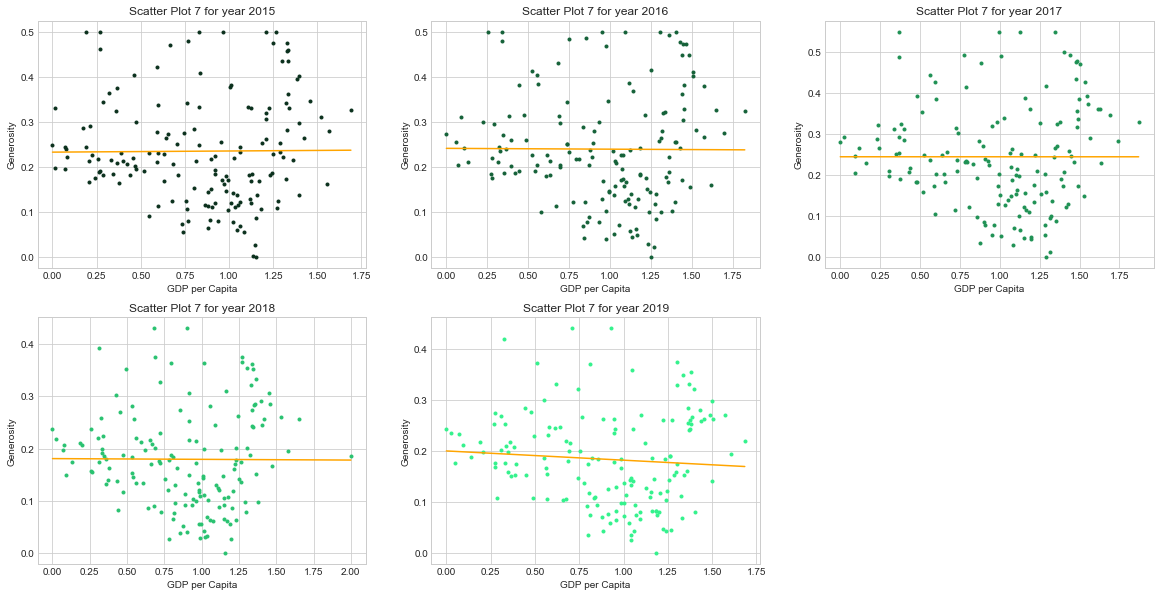

In [34]:
# Surprisingly, no correlation between GDP_per_capita and Generosity is found!

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].GDP_per_capita,Hap[k].Generosity,'.',color=((k+1)*0.04,(k+1)*0.19,(k+1)*0.11))
    Lin_Reg(Hap[k].GDP_per_capita,Hap[k].Generosity,'orange')
    plt.title('Scatter Plot 7 for year 201{}'.format(k+5))
    plt.xlabel('GDP per Capita')
    plt.ylabel('Generosity')

#### Is there any correlation between GDP_per_capita and Health?

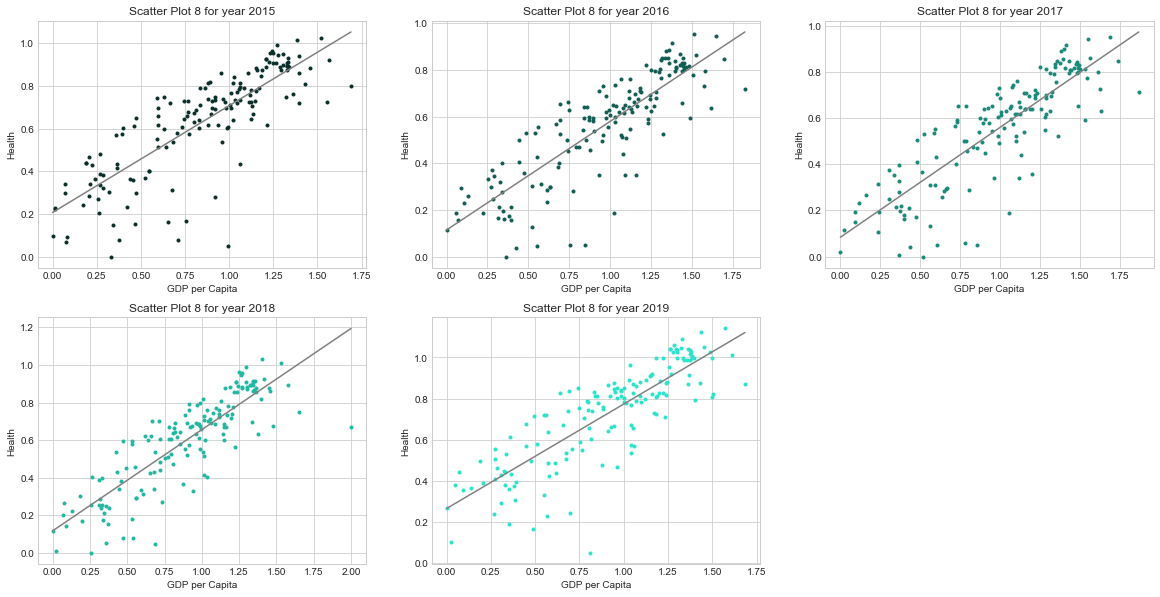

In [35]:
# As one might expect, there is a strong positive correlation between GDP_per_capita and Health!

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].GDP_per_capita,Hap[k].Health,'.',color=((k+1)*0.03,(k+1)*0.18,(k+1)*0.16))
    Lin_Reg(Hap[k].GDP_per_capita,Hap[k].Health,'gray')
    plt.title('Scatter Plot 8 for year 201{}'.format(k+5))
    plt.xlabel('GDP per Capita')
    plt.ylabel('Health')

#### Is there any correlation between GDP_per_capita and Freedom?

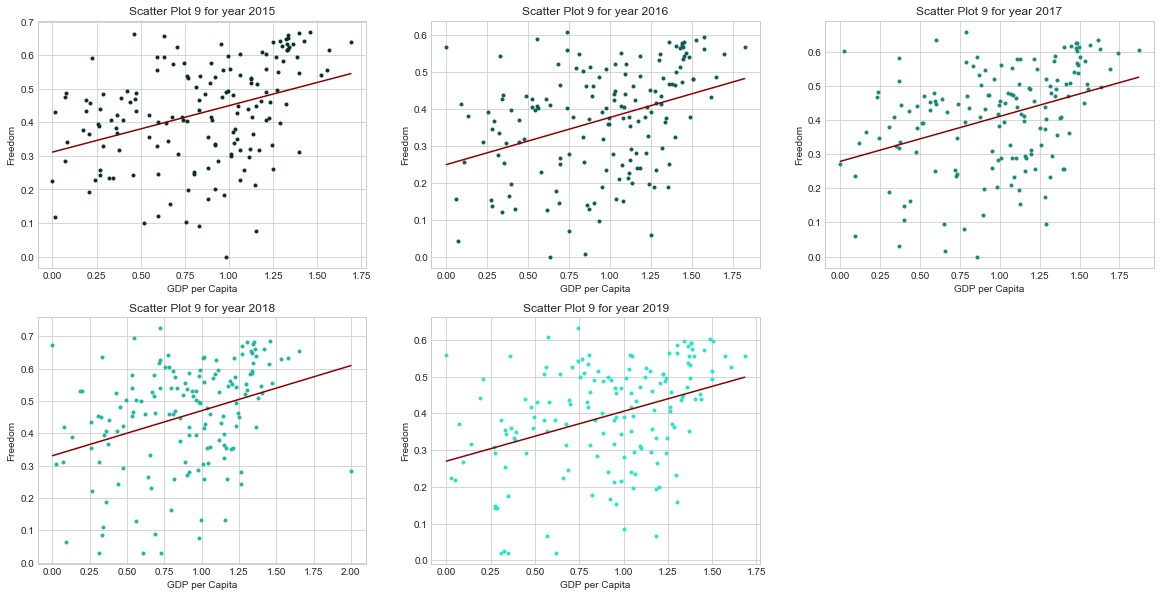

In [36]:
# The following scatter plots indicate that there is a somewhat weak positive correlation between GDP_per_capita 
# and Freedom.

for k in range(len(Hap)):
    plt.gcf().set_size_inches((20, 10)) 
    plt.subplot(2,3,k+1)
    plt.plot(Hap[k].GDP_per_capita,Hap[k].Freedom,'.',color=((k+1)*0.03,(k+1)*0.18,(k+1)*0.16))
    Lin_Reg(Hap[k].GDP_per_capita,Hap[k].Freedom,'darkred')
    plt.title('Scatter Plot 9 for year 201{}'.format(k+5))
    plt.xlabel('GDP per Capita')
    plt.ylabel('Freedom')